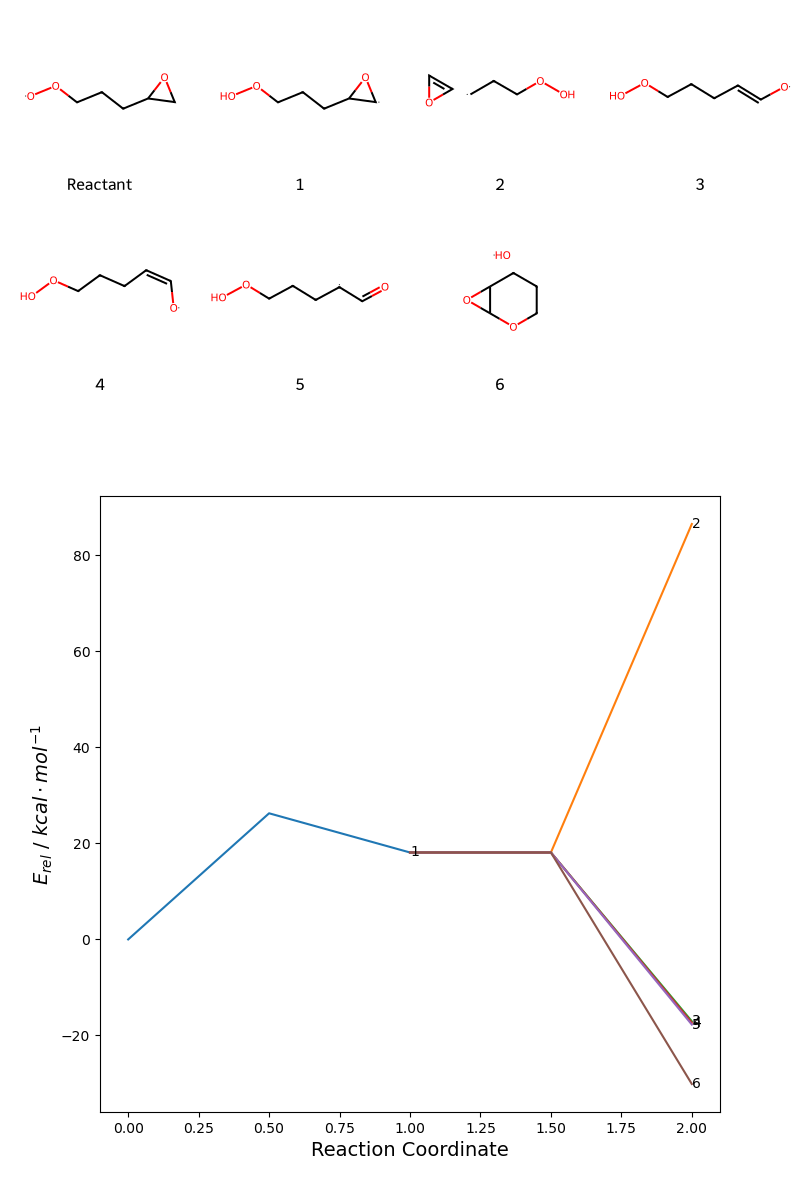

In [ ]:
import matplotlib.pyplot as plt
import io
from PIL import Image
from rdkit import Chem
from rdkit.Chem.Draw import MolsToGridImage

# --- R5OO
starting_structure = ("[O]OCCCC1CO1", 0.0, 0.00)
surfaces = {
    # "B 8 0": [starting_structure, ("TS", 0.5, 42.33), ("[OH].O=CCCC1CO1", 1.0, -25.45)],
    
    # "R5OO > R5OOH4": [starting_structure, ("TS", 0.5, 33.72), ("OOC[CH]CC1CO1", 1.0, 14.39)],
    # "R5OOH4 > B 2 1": [("OOC[CH]CC1CO1", 1.0, 14.39), ("TS", 1.5, 14.39), ("O[O].C=CCC1CO1", 2.0, 3.77 + 14.39)],
    # "R5OOH4 > B 4 5": [("OOC[CH]CC1CO1", 1.0, 14.39), ("TS", 1.5, 14.39), ("[CH]1CO1.C=CCOO", 2.0, 30.57 + 14.39)],
    # "R5OOH4 > B 1 0": [("OOC[CH]CC1CO1", 1.0, 14.39), ("TS", 1.5, 14.39), ("[OH].C1OC1CC1OC1", 2.0, -16.67 + 14.39)],

    # "R5OO > R5OOH3": [starting_structure, ("TS", 0.5, 23.07), ("OOCC[CH]C1CO1", 1.0, 12.10)],
    # "R5OOH3 > B 3 2": [("OOCC[CH]C1CO1", 1.0, 12.10), ("TS", 1.5, 12.10), ("C=O.[OH].C=CC1CO1", 2.0, -13.03 + 12.10)],
    # "R5OOH3 > trans B 5 6": [("OOCC[CH]C1CO1", 1.0, 12.10), ("TS", 1.5, 12.10), (r"[CH2]O/C=C/CCOO", 2.0, -4.09 + 12.10)],
    # "R5OOH3 > cis B 5 6": [("OOCC[CH]C1CO1", 1.0, 12.10), ("TS", 1.5, 12.10), (r"[CH2]O/C=C\CCOO", 2.0, -4.78 + 12.10)],
    # "R5OOH3 > trans B 5 7": [("OOCC[CH]C1CO1", 1.0, 12.10), ("TS", 1.5, 12.10), (r"[O]C/C=C/CCOO", 2.0, -2.93 + 12.10)],
    # "R5OOH3 > cis B 5 7": [("OOCC[CH]C1CO1", 1.0, 12.10), ("TS", 1.5, 12.10), (r"[O]C/C=C\CCOO", 2.0, -1.15 + 12.10)],
    # "R5OOH3 > B 1 0": [("OOCC[CH]C1CO1", 1.0, 12.10), ("TS", 1.5, 12.10), (r"[OH].C1OCC1C1CO1", 2.0, -13.46 + 12.10)],

    # "R5OO > R5OOH2": [starting_structure, ("TS", 0.5, 23.79), ("OOCCC[C]1CO1", 1.0, 17.11)],
    # "R5OOH2 > B 4 3": [("OOCCC[C]1CO1", 1.0, 17.11), ("TS", 1.5, 17.11), ("[CH2]COO.C=C1CO1", 2.0, 27.04 + 17.11)],
    # "R5OOH2 > B 7 6": [("OOCCC[C]1CO1", 1.0, 17.11), ("TS", 1.5, 17.11), ("OOCCCC(=O)[CH2]", 2.0, -33.78 + 17.11)],
    # "R5OOH2 > B 6 7": [("OOCCC[C]1CO1", 1.0, 17.11), ("TS", 1.5, 17.11), ("OOCCCC(=C)[O]", 2.0, -35.34 + 17.11)],
    # "R5OOH2 > B 1 0": [("OOCCC[C]1CO1", 1.0, 17.11), ("TS", 1.5, 17.11), ("[OH].O1CCCC12CO2", 2.0, -46.02 + 17.11)],

    # "R5OO > R5OOH1": [starting_structure, ("TS", 0.5, 26.26), ("OOCCCC1[CH]O1", 1.0, 18.10)],
    # "R5OOH1 > B 5 4": [("OOCCCC1[CH]O1", 1.0, 18.10), ("TS", 1.5, 18.10), ("C1=CO1.[CH2]CCOO", 2.0, 68.39 + 18.10)],
    # "R5OOH1 > trans B 5 7": [("OOCCCC1[CH]O1", 1.0, 18.10), ("TS", 1.5, 18.10), (r"OOCCC/C=C/[O]", 2.0, -35.14 + 18.10)],
    # "R5OOH1 > cis B 5 7": [("OOCCCC1[CH]O1", 1.0, 18.10), ("TS", 1.5, 18.10), (r"OOCCC/C=C\[O]", 2.0, -35.47 + 18.10)],
    # "R5OOH1 > B 7 5": [("OOCCCC1[CH]O1", 1.0, 18.10), ("TS", 1.5, 18.10), ("OOCCC[CH]C=O", 2.0, -35.83 + 18.10)],
    # "R5OOH1 > B 1 0": [("OOCCCC1[CH]O1", 1.0, 18.10), ("TS", 1.5, 18.10), ("[OH].C12OC2OCCC1", 2.0, -48.20 + 18.10)],
}

# --- R5
# starting_structure = ("[CH2]CCC1CO1", 0.0, 0.00)
# surfaces = {
#     "R5 > R4": [starting_structure, ("TS", 0.5, 40.06), ("C[CH]CC1CO1", 1.0, -2.52)],
#     "R5 > R3": [starting_structure, ("TS", 0.5, 38.39), ("CC[CH]C1CO1", 1.0, -3.98)],
#     "R5 > R2": [starting_structure, ("TS", 0.5, 25.22), ("CCC[C]1CO1", 1.0, 0.77)],
#     "R5 > R1": [starting_structure, ("TS", 0.5, 17.89), ("CCCC1[CH]O1", 1.0, 2.58)],
#     "Beta Cl": [starting_structure, ("TS", 0.5, 30.97), ("C=C.[CH2]C1CO1", 1.0, 21.12)],
# }

buffer = io.BytesIO()

smiles = [starting_structure[0]] + [pes[-1][0] for pes in surfaces.values()]
mols = [Chem.MolFromSmiles(smile) for smile in smiles]
legends = ["Reactant"] + [str((i + 1)) for i in range(len(mols[1:]))]
legImg = MolsToGridImage(mols=mols, legends=legends, molsPerRow=4)

dpi = 100
fig, ax = plt.subplots(figsize=(800 / dpi, 800 / dpi), dpi=dpi)
for i, (label, pes_data) in enumerate(surfaces.items(), start=1):
    x = [coord for _, coord, _ in pes_data]
    y = [energy for _, _, energy in pes_data]

    ax.plot(x, y)
    ax.text(x[-1], y[-1], i, fontsize=10, va="center", ha="left")

ax.set_xlabel("Reaction Coordinate", fontsize=14)
ax.set_ylabel(r"$E_{rel}$ / $kcal \cdot mol^{-1}$", fontsize=14)

legStream = io.BytesIO(legImg.data)
legImg = Image.open(legStream)
legWidth, legHght = legImg.size

plt.savefig(buffer, format="png")
plt.close()
buffer.seek(0)
pltImg = Image.open(buffer)
pltWidth, pltHght = pltImg.size

new_width = max(legWidth, pltWidth)
new_height = legHght + pltHght

combined_img = Image.new("RGB", (new_width, new_height))
combined_img.paste(legImg, (0, 0))
combined_img.paste(pltImg, (0, legHght))

combined_img